# Artificial neural networks (10 marks)

In [9]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time
from model_utils import learning_curves
plt.rcParams.update({'font.size': 20})

In [2]:
# Load the fashion-MNIST dataset

import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [3]:
# Train a Neural Net

mlp = MLPClassifier()
start = time.time()
mlp.fit(X_train, y_train)
end = time.time()
print("Training accuracy:", accuracy_score(y_train, mlp.predict(X_train)))
print("Test set accuracy:", accuracy_score(y_test, mlp.predict(X_test)))
print(f"Training time: {end - start}s")

Training accuracy: 0.9944666666666667
Test set accuracy: 0.8753
Training time: 192.2342607975006s


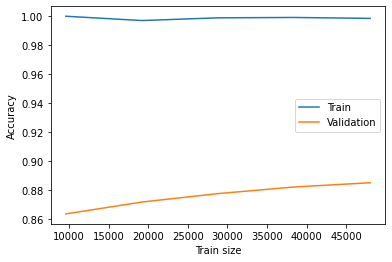

In [4]:
# Plot learning curves

learning_curves(mlp, X_train, y_train)

Training accuracy for alpha = 0 : 0.99455
Test accuracy for alpha = 0 : 0.8792
Training accuracy for alpha = 1e-05 : 0.9971333333333333
Test accuracy for alpha = 1e-05 : 0.8799
Training accuracy for alpha = 0.0001 : 0.9893333333333333
Test accuracy for alpha = 0.0001 : 0.8745
Training accuracy for alpha = 0.001 : 0.9952833333333333
Test accuracy for alpha = 0.001 : 0.8797
Training accuracy for alpha = 0.01 : 0.9908333333333333
Test accuracy for alpha = 0.01 : 0.8844
Training accuracy for alpha = 0.1 : 0.97435
Test accuracy for alpha = 0.1 : 0.8865
Training accuracy for alpha = 1 : 0.8995333333333333
Test accuracy for alpha = 1 : 0.8725
Training accuracy for alpha = 10 : 0.83115
Test accuracy for alpha = 10 : 0.8207
[0.99455, 0.9971333333333333, 0.9893333333333333, 0.9952833333333333, 0.9908333333333333, 0.97435, 0.8995333333333333, 0.83115]
[0.8792, 0.8799, 0.8745, 0.8797, 0.8844, 0.8865, 0.8725, 0.8207]
0.013999999999999901


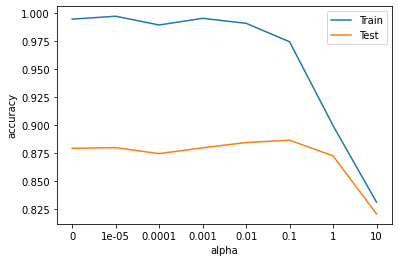

In [5]:
# Compare different values of alpha

alphas = [0, 0.00001,0.0001,0.001,0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for alpha in alphas:
    mlp = MLPClassifier(alpha=alpha)
    mlp.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, mlp.predict(X_train))
    test_acc = accuracy_score(y_test, mlp.predict(X_test))
    print("Training accuracy for alpha =", alpha, ":", train_acc)
    print("Test accuracy for alpha =", alpha, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(train_accuracies)
print(test_accuracies)

x = range(len(alphas))
plt.plot(x, train_accuracies, label='Train')
plt.plot(x, test_accuracies, label='Test')

plt.xticks(x, alphas)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()

print(max(test_accuracies[0:len(alphas)-1]) - min(test_accuracies[0:len(alphas)-1]))

/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy for layers = (32,) : 0.9834666666666667
Test accuracy for layers = (32,) : 0.8556
Training accuracy for layers = (64,) : 0.9949666666666667
Test accuracy for layers = (64,) : 0.8732
Training accuracy for layers = (128,) : 0.99885
Test accuracy for layers = (128,) : 0.887
Training accuracy for layers = (256,) : 0.99165
Test accuracy for layers = (256,) : 0.8922
Training accuracy for layers = (512,) : 0.9973333333333333
Test accuracy for layers = (512,) : 0.897
[0.9834666666666667, 0.9949666666666667, 0.99885, 0.99165, 0.9973333333333333]
[0.8556, 0.8732, 0.887, 0.8922, 0.897]


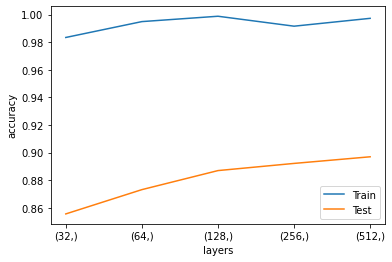

In [7]:
# Compare different values of hidden layer size

layer_sizes = [(32,), (64,), (128,), (256,), (512,)]
train_accuracies = []
test_accuracies = []
for layers in layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=layers)
    mlp.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, mlp.predict(X_train))
    test_acc = accuracy_score(y_test, mlp.predict(X_test))
    print("Training accuracy for layers =", layers, ":", train_acc)
    print("Test accuracy for layers =", layers, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(train_accuracies)
print(test_accuracies)

x = range(len(layer_sizes))
plt.plot(x, train_accuracies, label='Train')
plt.plot(x, test_accuracies, label='Test')

plt.xticks(x, layer_sizes)
plt.xlabel('layers')
plt.ylabel('accuracy')
plt.legend()

In [8]:
# Compare different solvers

solvers = ["lbfgs", "sgd", "adam"]
train_accuracies = []
test_accuracies = []
for solver in solvers:
    mlp = MLPClassifier(solver=solver)
    mlp.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, mlp.predict(X_train))
    test_acc = accuracy_score(y_test, mlp.predict(X_test))
    print("Training accuracy for solver =", solver, ":", train_acc)
    print("Test accuracy for solver =", solver, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(train_accuracies)
print(test_accuracies)

/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training accuracy for solver = lbfgs : 0.9692833333333334
Test accuracy for solver = lbfgs : 0.8768


/Users/lucy/opt/anaconda3/envs/ML_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training accuracy for solver = sgd : 0.96365
Test accuracy for solver = sgd : 0.8836
Training accuracy for solver = adam : 0.9928166666666667
Test accuracy for solver = adam : 0.885
[0.9692833333333334, 0.96365, 0.9928166666666667]
[0.8768, 0.8836, 0.885]


In [47]:
# Plot decision boundaries

pca = PCA(n_components=2)
X = pca.fit_transform(X_train)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

mlp2 = MLPClassifier()
mlp2.fit(X, y_train)
Z = mlp2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


Text(0, 0.5, '2nd Principal Component')

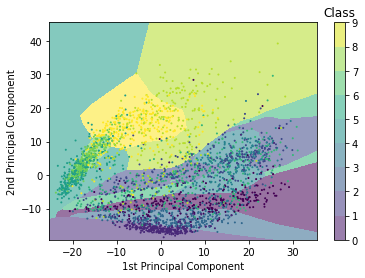

In [60]:
contour = plt.pcolormesh(xx, yy, Z, cmap='viridis', shading='auto', alpha=0.55)
clb = plt.colorbar(contour, boundaries=list(np.unique(Z)), ticks=list(np.unique(Z)),spacing='proportional')

X_train_subsample = X_train[:3000]
y_train_subsample = y_train[:3000]

pca = PCA(n_components=2)
X1 = pca.fit_transform(X_train_subsample)

plt.scatter(X1[:, 0], X1[:, 1], c=y_train_subsample, s=1, cmap='viridis')
clb.ax.set_title('Class')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

# Support vector machines (15 marks)

In [5]:
X_train_subsample = X_train[:1000]
y_train_subsample = y_train[:1000]
X_test_subsample = X_test[:1000]
y_test_subsample = y_test[:1000]

svm = SVC()
start = time.time()
svm.fit(X_train_subsample, y_train_subsample)
end = time.time()
print(f'SVM classifier train accuracy: {svm.score(X_train_subsample, y_train_subsample)}')
print(f'SVM classifier test accuracy: {svm.score(X_test_subsample, y_test_subsample)}')
print(f"Training time: {end - start}s")

SVM classifier train accuracy: 0.922
SVM classifier test accuracy: 0.795
Training time: 0.2899630069732666s


In [ ]:
learning_curves(svm, X_train, y_train)

In [6]:
# Compare different types of kernel {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’} default=’rbf’

kernels = ["linear", "poly", "rbf", "sigmoid"]
train_accuracies = []
test_accuracies = []
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_subsample, y_train_subsample)
    train_acc = accuracy_score(y_train_subsample, svm.predict(X_train_subsample))
    test_acc = accuracy_score(y_test_subsample, svm.predict(X_test_subsample))
    print("Training accuracy for", kernel, ":", train_acc)
    print("Test accuracy for", kernel, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(train_accuracies)
print(test_accuracies)

Training accuracy for linear : 1.0
Test accuracy for linear : 0.778
Training accuracy for poly : 0.828
Test accuracy for poly : 0.684
Training accuracy for rbf : 0.922
Test accuracy for rbf : 0.795
Training accuracy for sigmoid : 0.82
Test accuracy for sigmoid : 0.76


Training accuracy for 1e-05 : 0.432
Test accuracy for 1e-05 : 0.402
Training accuracy for 0.0001 : 0.779
Test accuracy for 0.0001 : 0.73
Training accuracy for 0.001 : 0.902
Test accuracy for 0.001 : 0.791
Training accuracy for 0.01 : 1.0
Test accuracy for 0.01 : 0.651
Training accuracy for 0.1 : 1.0
Test accuracy for 0.1 : 0.096
Training accuracy for 1 : 1.0
Test accuracy for 1 : 0.095
Training accuracy for 10 : 1.0
Test accuracy for 10 : 0.095
[0.432, 0.779, 0.902, 1.0, 1.0, 1.0, 1.0]
[0.402, 0.73, 0.791, 0.651, 0.096, 0.095, 0.095]


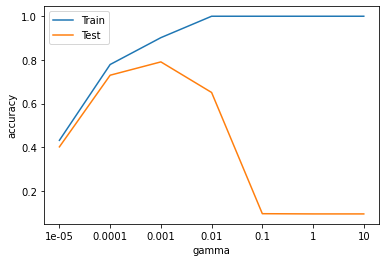

In [14]:
# Plot result of changing gamma in RBF kernel

gammas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for gamma in gammas:
    svm = SVC(gamma=gamma, max_iter=1000)
    svm.fit(X_train_subsample, y_train_subsample)
    train_acc = accuracy_score(y_train_subsample, svm.predict(X_train_subsample))
    test_acc = accuracy_score(y_test_subsample, svm.predict(X_test_subsample))
    print("Training accuracy for", gamma, ":", train_acc)
    print("Test accuracy for", gamma, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(train_accuracies)
print(test_accuracies)

x = range(len(gammas))
plt.plot(x, train_accuracies, label='Train')
plt.plot(x, test_accuracies, label='Test')

plt.xticks(x, gammas)
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.legend()

Training accuracy for C = 1e-05 : 0.115
Test accuracy for C = 1e-05 : 0.095
Training accuracy for C = 0.0001 : 0.115
Test accuracy for C = 0.0001 : 0.095
Training accuracy for C = 0.001 : 0.115
Test accuracy for C = 0.001 : 0.095
Training accuracy for C = 0.01 : 0.115
Test accuracy for C = 0.01 : 0.095
Training accuracy for C = 0.1 : 0.742
Test accuracy for C = 0.1 : 0.696
Training accuracy for C = 1 : 0.922
Test accuracy for C = 1 : 0.795
Training accuracy for C = 10 : 0.999
Test accuracy for C = 10 : 0.823
[0.115, 0.115, 0.115, 0.115, 0.742, 0.922, 0.999]
[0.095, 0.095, 0.095, 0.095, 0.696, 0.795, 0.823]


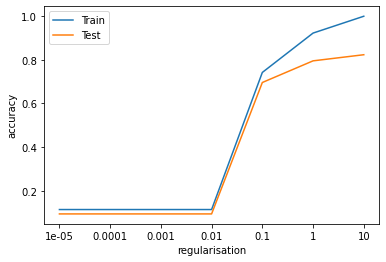

In [15]:
# Compare different values of C (regularisation)

Cs = [0.00001,0.0001,0.001,0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []
for c in Cs:
    svm = SVC(C=c)
    svm.fit(X_train_subsample, y_train_subsample)
    train_acc = accuracy_score(y_train_subsample, svm.predict(X_train_subsample))
    test_acc = accuracy_score(y_test_subsample, svm.predict(X_test_subsample))
    print("Training accuracy for C =", c, ":", train_acc)
    print("Test accuracy for C =", c, ":", test_acc)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

print(train_accuracies)
print(test_accuracies)

x = range(len(Cs))
plt.plot(x, train_accuracies, label='Train')
plt.plot(x, test_accuracies, label='Test')

plt.xticks(x, Cs)
plt.xlabel('regularisation')
plt.ylabel('accuracy')
plt.legend()

In [5]:
# Plot decision boundaries

pca = PCA(n_components=2)
X = pca.fit_transform(X_train)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

svm = SVC()
svm.fit(X, y_train)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

Text(0, 0.5, '2nd Principal Component')

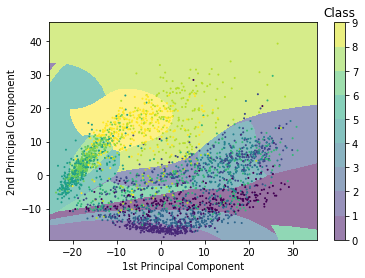

In [6]:
contour = plt.pcolormesh(xx, yy, Z, cmap='viridis', shading='auto', alpha=0.55)
clb = plt.colorbar(contour, boundaries=list(np.unique(Z)), ticks=list(np.unique(Z)),spacing='proportional')

X_train_subsample = X_train[:3000]
y_train_subsample = y_train[:3000]

pca = PCA(n_components=2)
X1 = pca.fit_transform(X_train_subsample)

plt.scatter(X1[:, 0], X1[:, 1], c=y_train_subsample, s=1, cmap='viridis')
clb.ax.set_title('Class')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

(0.0, 1.0)

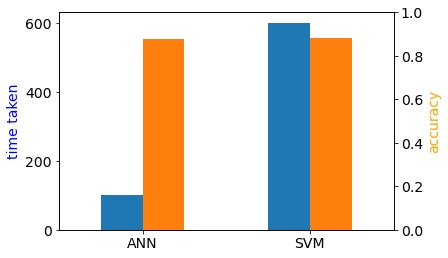

In [32]:
# Compare ANN with SVM
    
X = ["ANN", "SVM"]
X_axis = np.arange(len(X))
times = [100.71, 600.15]
test_accuracies = [0.879, 0.884]

df = pd.DataFrame({'time taken': times, 'accuracy': test_accuracies}, index=['ANN', 'SVM'])
ax = df.plot(kind='bar', secondary_y='accuracy', rot=0, legend=False, fontsize=14)
ax.set_ylabel('time taken', fontsize=14, color="blue")
ax.right_ax.set_ylabel('accuracy', fontsize=14, color="orange")
ax.right_ax.set_ylim(0, 1)
